<a href="https://colab.research.google.com/github/Malvez/Trabalhos_RN/blob/main/Redes_Neurais_Trabalho_3_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
#Carregar a base de dados
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
data = pd.read_csv(url, usecols=[1], engine='python')
data.columns = ['Sales']

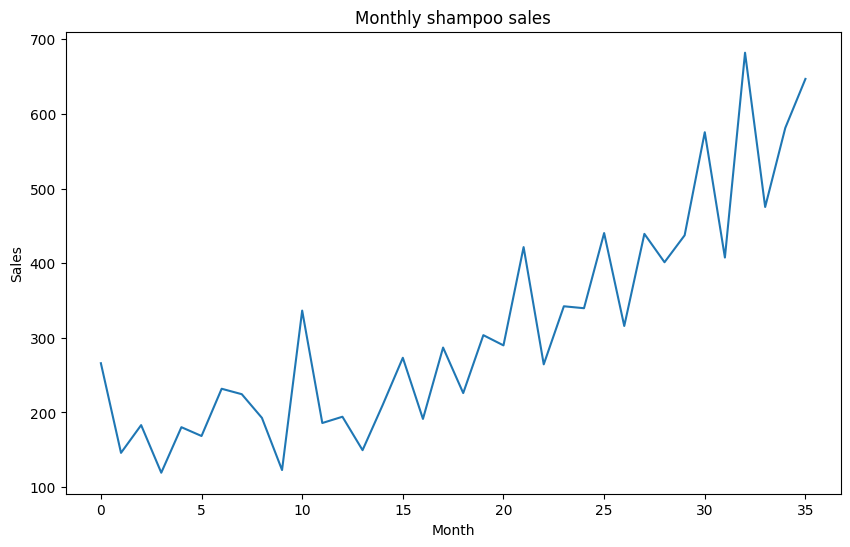

In [3]:
# Plotar a série temporal
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'])
plt.title('Monthly shampoo sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [4]:
#Dividir os dados em treinamento e teste
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

#Modelo Naive
def naive_forecast(train, test):
    y_hat_naive = np.asarray([train.iloc[-1]['Sales']] * len(test))
    return y_hat_naive

In [5]:
naive_pred = naive_forecast(train, test)
naive_mse = mean_squared_error(test, naive_pred)
print(f'Naïve Forecasting MSE: {naive_mse:.3f}')

Naïve Forecasting MSE: 18057.999


In [8]:
#Modelo ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
arima_pred = model_fit.forecast(steps=len(test))
arima_mse = mean_squared_error(test, arima_pred)
print(f'ARIMA Forecasting MSE: {arima_mse:.3f}')

ARIMA Forecasting MSE: 31030.618


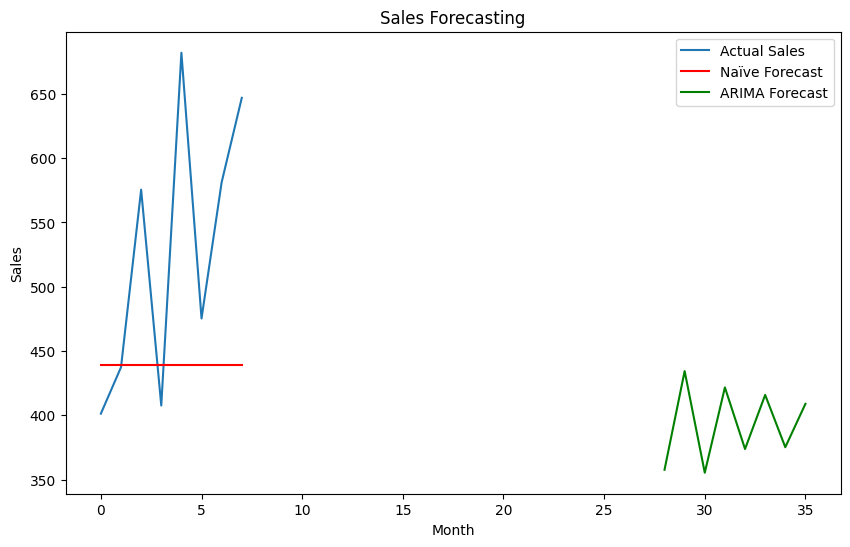

In [9]:
#Comparar os resultados
plt.figure(figsize=(10, 6))
plt.plot(test.values, label='Actual Sales')
plt.plot(naive_pred, label='Naïve Forecast', color='red')
plt.plot(arima_pred, label='ARIMA Forecast', color='green')
plt.title('Sales Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()